<a href="https://colab.research.google.com/github/21Ovi/Earthquake-Damage-Prediction/blob/main/Equake_Beta_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [ ]:
X = pd.read_csv("https://raw.githubusercontent.com/21Ovi/DataScience-DataSets/main/PRCP-1015-EquakeDamagePred/Data/train_values.csv")
y = pd.read_csv("https://raw.githubusercontent.com/21Ovi/DataScience-DataSets/main/PRCP-1015-EquakeDamagePred/Data/train_labels.csv")                
X.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
y.describe()

,building_id,damage_grade
count,2.606010e+05,260601.000000
mean,5.256755e+05,2.238272
std,3.045450e+05,0.611814
min,4.000000e+00,1.000000
25%,2.611900e+05,2.000000
50%,5.257570e+05,2.000000
75%,7.897620e+05,3.000000
max,1.052934e+06,3.000000


In [5]:
df = X.merge(y, left_on="building_id", right_on="building_id", how="left")
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


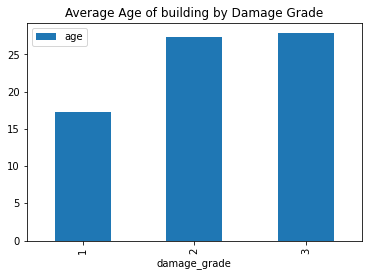

In [7]:
df[["age", "damage_grade"]].groupby(["damage_grade"]).mean().plot(kind="bar", title="Average Age of building by Damage Grade");

In [8]:
df[["age", "damage_grade"]].groupby(["damage_grade"]).mean()

,age
damage_grade,
1,17.320490
2,27.342118
3,27.817423


In [10]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [11]:
len(df.columns)

40

In [12]:
df.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [14]:
pd.unique(df['geo_level_1_id'])

array([ 6,  8, 21, 22, 11,  9, 20,  0, 26, 17, 12, 18,  4, 27, 25, 10,  7,
        3, 13, 30, 16,  5, 15, 14, 19,  1, 24, 28, 23,  2, 29])

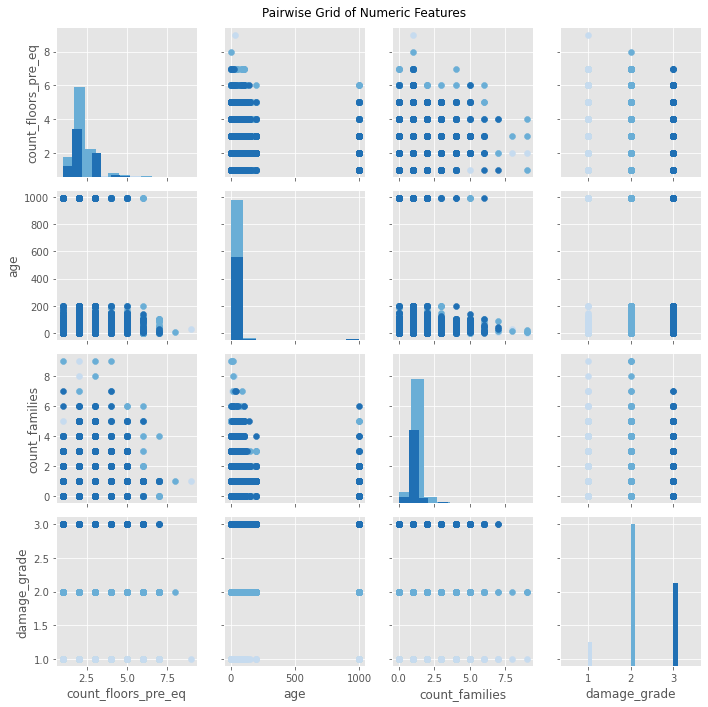

In [19]:
# Pair grid of key variables.
g = sns.PairGrid(df, vars=["count_floors_pre_eq", "age", "count_families", "damage_grade"], palette='Blues', hue='damage_grade')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Pairwise Grid of Numeric Features');

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Features')

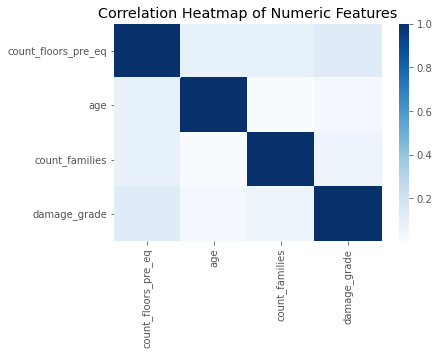

In [21]:
a = df[['count_floors_pre_eq','age','count_families','damage_grade']]
corr = a.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap='Blues')
plt.title('Correlation Heatmap of Numeric Features')

Text(0, 0.5, 'Average Count of Floors')

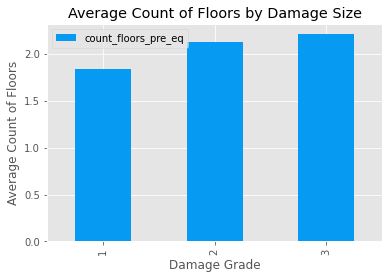

In [23]:
df[['count_floors_pre_eq', 'damage_grade']].groupby(['damage_grade']).mean().plot(kind='bar', title='Average Count of Floors by Damage Size', color='xkcd:azure')
plt.xlabel('Damage Grade')
plt.ylabel('Average Count of Floors')

Text(0.5, 0, 'Damage Grade')

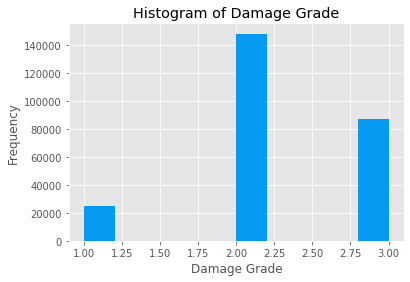

In [25]:
df['damage_grade'].plot(kind='hist', title='Histogram of Damage Grade', color='xkcd:azure', label='damage_grade')
plt.xlabel('Damage Grade')

In [26]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

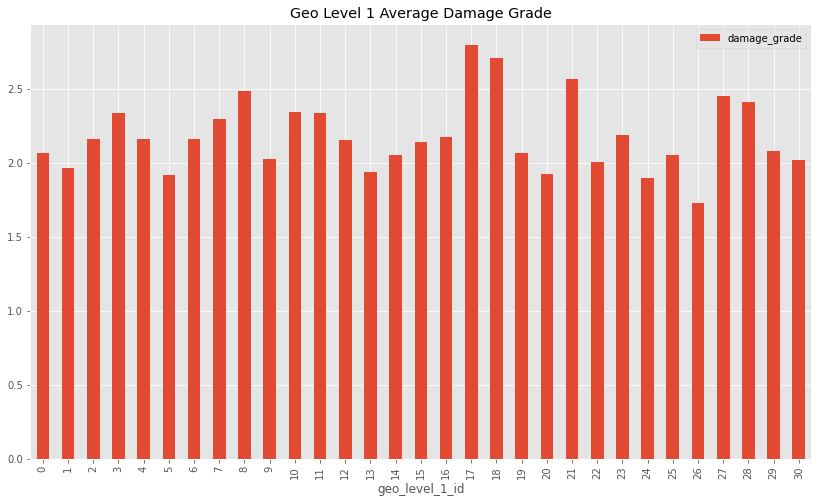

In [28]:
df[['geo_level_1_id', 'damage_grade']].groupby(['geo_level_1_id']).mean().plot(kind='bar', figsize=(14, 8), title='Geo Level 1 Average Damage Grade');

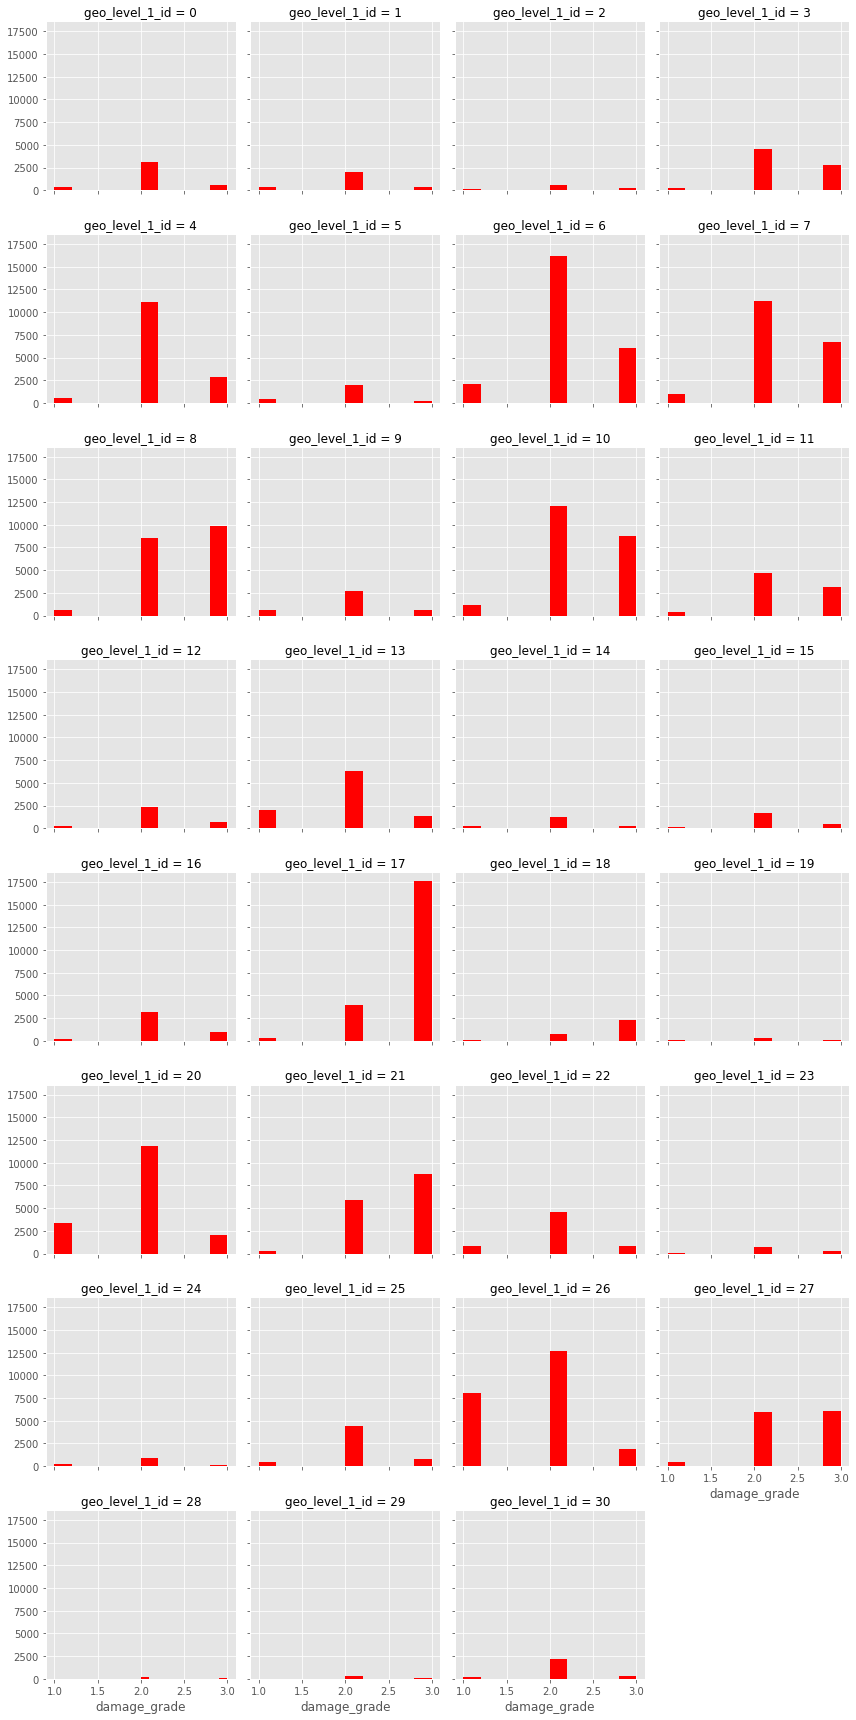

In [29]:
g = sns.FacetGrid(df, col='geo_level_1_id', col_wrap=4)
g = g.map(plt.hist, "damage_grade", color="r")

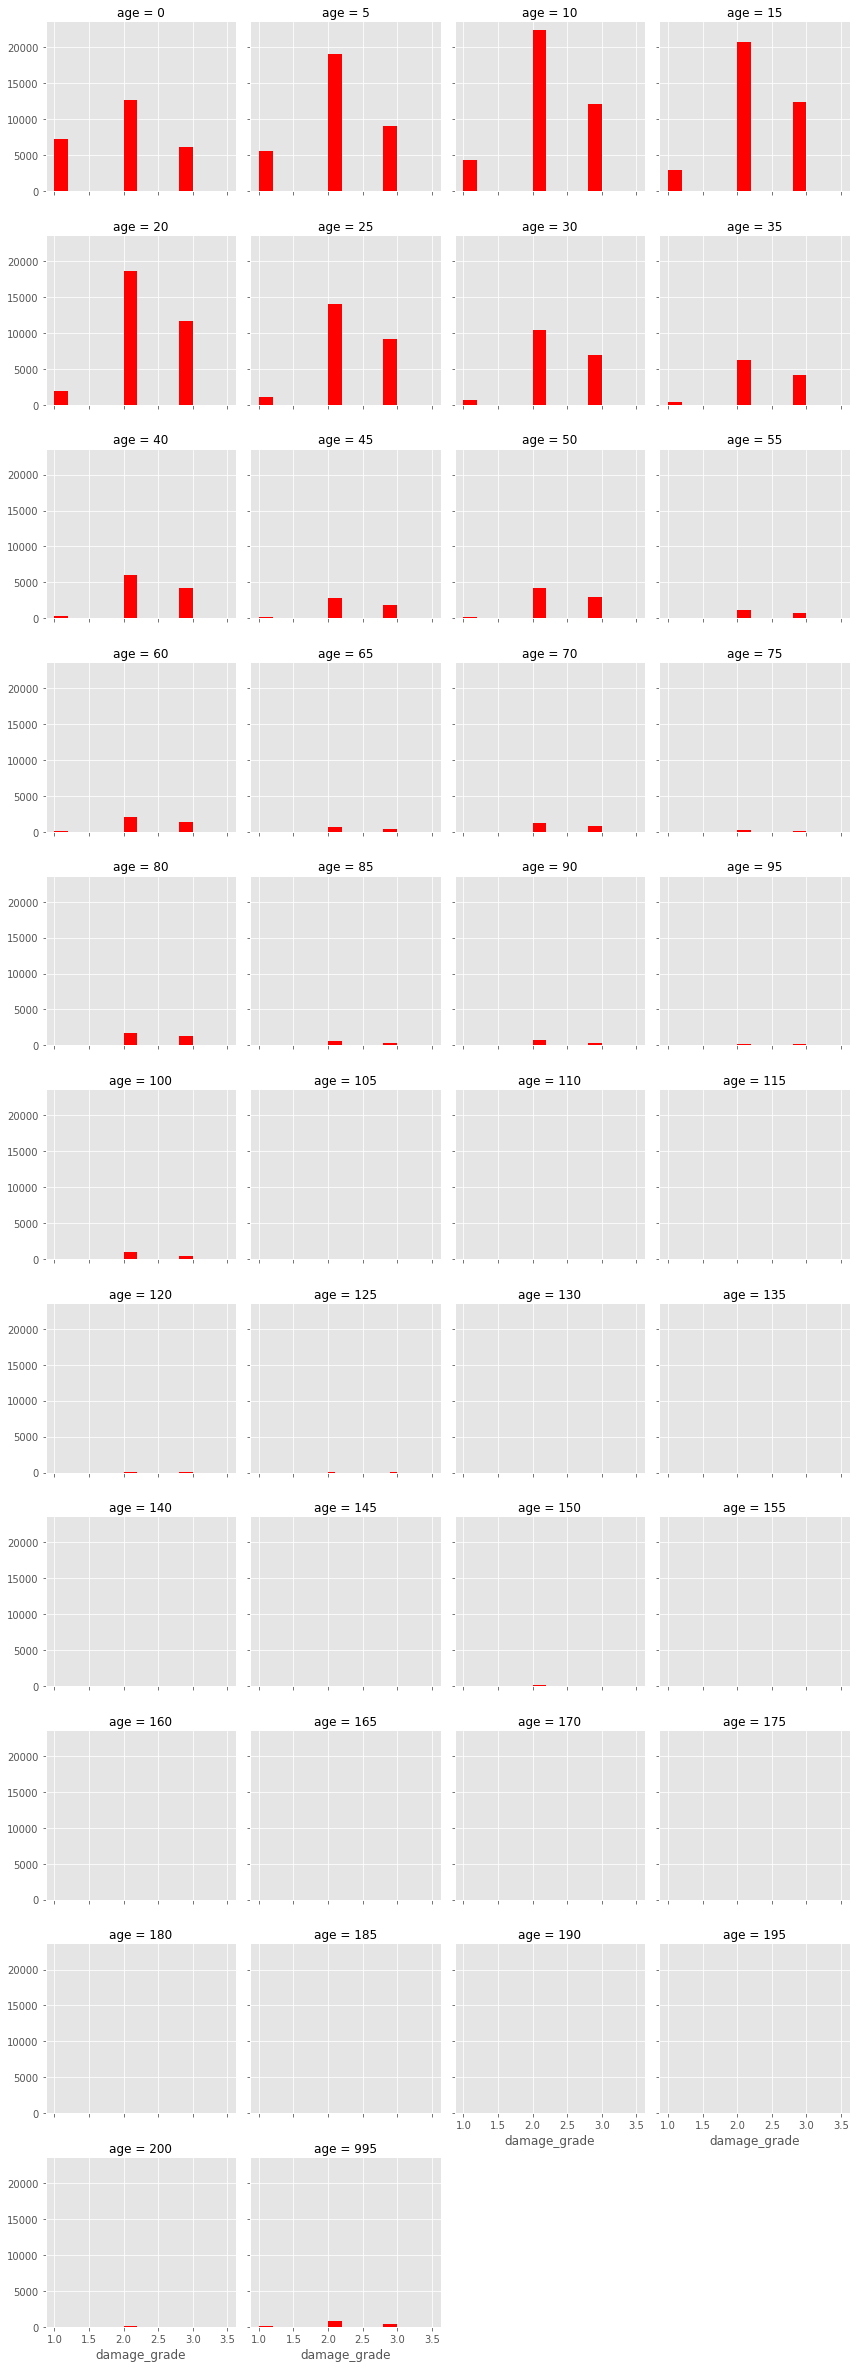

In [30]:
g = sns.FacetGrid(df, col='age', col_wrap=4)
g = g.map(plt.hist, "damage_grade", color="r")

In [31]:
df['superstructure'] = df[['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone']].idxmax(axis=1)
df['superstructure_type'] = df[['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag','has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick','has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered','has_superstructure_rc_engineered','has_superstructure_other']].idxmax(axis=1)
#test['superstructure_type'] = test[['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag','has_superstructu

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


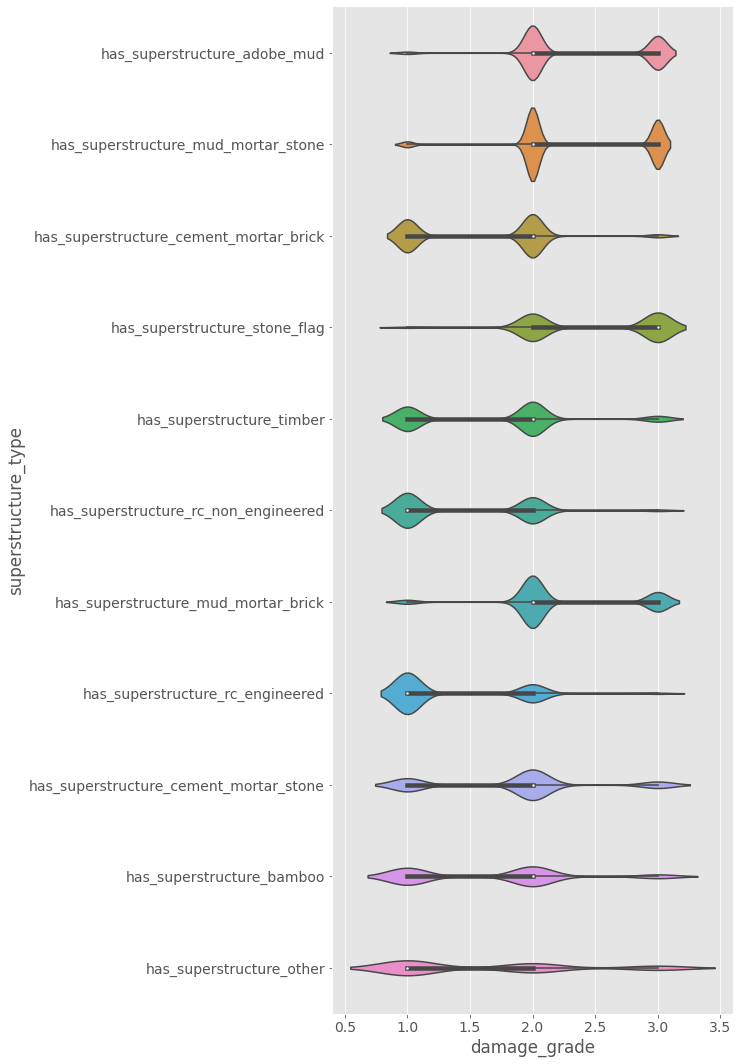

In [32]:
plt.rcParams.update({'font.size': 14})
sns.factorplot(x="damage_grade", y="superstructure_type", data=df, kind="violin", size=15, aspect=.7);

In [33]:
df[(df.age >= 100)].shape

(3488, 42)

In [34]:
df[(df.age >= 200)].shape

(1496, 42)

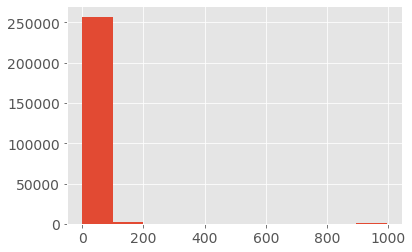

In [36]:
plt.hist(df.age);

In [37]:
df = pd.get_dummies(df)

In [38]:
df.head().T

,0,1,2,3,4
building_id,802906,28830,94947,590882,201944
geo_level_1_id,6,8,21,22,11
geo_level_2_id,487,900,363,418,131
geo_level_3_id,12198,2812,8973,10694,1488
count_floors_pre_eq,2,2,2,2,3
...,...,...,...,...,...
superstructure_type_has_superstructure_other,0,0,0,0,0
superstructure_type_has_superstructure_rc_engineered,0,0,0,0,0
superstructure_type_has_superstructure_rc_non_engineered,0,0,0,0,0
superstructure_type_has_superstructure_stone_flag,0,0,0,0,0


In [40]:
#geo1_dummies = pd.get_dummies(df.geo_level_1_id)
#df = df.drop('geo_level_1_id', axis=1)
#df = df.join(geo1_dummies)

In [41]:
df

,building_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,21,22,23,24,25,26,27,28,29,30
0,802906,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,28830,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,94947,363,8973,2,10,5,5,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,590882,418,10694,2,10,6,5,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,201944,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,1335,1621,1,55,6,3,0,1,0,...,0,0,0,0,1,0,0,0,0,0
260597,669485,715,2060,2,0,6,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
260598,602512,51,8163,3,55,6,7,0,1,0,...,0,0,0,0,0,0,0,0,0,0
260599,151409,39,1851,2,10,14,6,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
df.shape

(260601, 113)

In [46]:
# impute density for area feature
#vals = df.area.value_counts()
#dvals = vals.to_dict()
#df['area_density'] = df.area.apply(lambda x: dvals.get(x, vals.min()))

# impute density for age feature
#vals = df.age.value_counts()
#dvals = vals.to_dict()
#df['age_density'] = df.age.apply(lambda x: dvals.get(x, vals.min()))

# impute density for height feature
#vals = df.height.value_counts()
#dvals = vals.to_dict()
#df['height_density'] = df.height.apply(lambda x: dvals.get(x, vals.min()))

# impute density for count_families feature
#vals = df.count_families.value_counts()
#dvals = vals.to_dict()
#df['count_families_density'] = df.age.apply(lambda x: dvals.get(x, vals.min()))

#df = df.drop(['geo_level_1_id','geo_level_2_id','geo_level_3_id'], axis=1)

